# Cournot Model

Imports and set magics:

In [21]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description and Analytical solution

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

**Cournot Model** applies for a market of the structure of a duopoly in which each firm chooses the quantity they want to supply to a demand. In order to solve this we suppose two firms with symetric costs functions and also the production of homogeneous goods. The residual demand curve could be consider as what one firm gets of the total demand.

In [2]:
q1 = sm.Symbol('q1') # quantity
q2 = sm.Symbol('q2') # quantity
Q = sm.Symbol('Q')   # Q = q1 + q2
total_Q = (sm.Eq(q1+q2,Q))
P = sm.Symbol('P')   # Profits
a = sm.Symbol('a')   # about demand
b = sm.Symbol('b')   # about demand
c = sm.Symbol('c')

We use the inverse demand because is a function of the quantities that both firms are going to sell. Q is the sum of the quantities of both firms

In [3]:
inv_demand = a - b*Q
inv_demand

-Q*b + a

Lets derive the residual demand of firm 1

In [4]:
direct_d = sm.Eq(inv_demand,P)
direct_demand = sm.solve(direct_d,Q)
direct_demand[0]

(-P + a)/b

In [5]:
new_q1 = sm.Eq(direct_demand[0]-q2,q1) #get the output of firm 1 based on firm 2 output and demand
new_q1 

Eq(-q2 + (-P + a)/b, q1)

In [6]:
inverse_demand1 = sm.solve(new_q1,P)
inverse_demand1[0]

a - b*q1 - b*q2

If we do the same for the firm 2 we will get the same result but in function of q1 because of the symmetry

In [7]:
new_q2 = sm.Eq(direct_demand[0]-q1,q2)
new_q2

Eq(-q1 + (-P + a)/b, q2)

In [8]:
inverse_demand2 = sm.solve(new_q2,P)
inverse_demand2[0]

a - b*q1 - b*q2

In the most general case of the Cournot model it is assumed that we have the same cost function for each firm.
So lets define a function for the cost

In [9]:
cost_func = c*Q
cost_func

Q*c

In [10]:
MC = abs(sm.diff(cost_func,Q)) #marginal cost, is always increasing if we increase the production of the good that's why is always positive
MC

Abs(c)

Now that we have the price of the inverse demand, the quantities that each firm produces and also its cost, so we can get the profit function.

In [11]:
profit1 = inverse_demand1[0]*q1-cost_func
profit1

-Q*c + q1*(a - b*q1 - b*q2)

In [12]:
profit2 = inverse_demand2[0]*q2-cost_func
profit2

-Q*c + q2*(a - b*q1 - b*q2)

In [13]:
FOC1 = sm.diff(inverse_demand1[0]*q1,q1) - sm.diff(cost_func,Q)
FOC1 = sm.Eq(FOC1,0) #equal to 0 so we can solve for the optimize q1
print(FOC1)

opt_q1 = sm.solve(FOC1,q1)
opt_q1f = sm.Eq(opt_q1[0],q1)
opt_q1f

Eq(a - 2*b*q1 - b*q2 - c, 0)


Eq((a - b*q2 - c)/(2*b), q1)

In [14]:
FOC2 = sm.diff(inverse_demand2[0]*q2,q2) - sm.diff(cost_func,Q)
FOC2 = sm.Eq(FOC2,0) #equal to 0 so we can solve for the optimize q1
print(FOC2)

opt_q2 = sm.solve(FOC2,q2)
opt_q2f = sm.Eq(opt_q2[0],q2)
opt_q2f

Eq(a - b*q1 - 2*b*q2 - c, 0)


Eq((a - b*q1 - c)/(2*b), q2)

When we get the optimal output of each firm it can be observed that it depends on the output of the other, so at the end the equilibrium in the market is going to be **Nash-equilibrium** between both outputs.

In [15]:
#in this part we want to get the value of q1 when we equal the optimal quantity of both firms
sol1 = opt_q1[0].subs(q2,opt_q2[0])
sub1 = sm.Eq(sol1,q1)
sol_sub1 = sm.solve(sub1,q1)
sol_sub1[0]

(a - c)/(3*b)

In [16]:
#we do the same but for the case of the firm 2
sol2 = opt_q2[0].subs(q1,opt_q1[0])
sub2 = sm.Eq(sol2,q2)
sol_sub2= sm.solve(sub2,q2)
sol_sub2[0]

(a - c)/(3*b)

Based on the code above, we can create functions for the result that we obtain

In [17]:
sol_q1_func = sm.lambdify(args = (a,b,c), expr = sol_sub1[0])
sol_q2_func = sm.lambdify(args = (a,b,c), expr = sol_sub2[0])

a_vec = np.array([1,2,3,5,8]) 
b_val = 0.5
c_val = 0.5

best_response_a = sol_q1_func(a_vec, b_val, c_val)
for d in best_response_a:
    print(f'best response q1(q2): {d:1.3f}')

best response q1(q2): 0.333
best response q1(q2): 1.000
best response q1(q2): 1.667
best response q1(q2): 3.000
best response q1(q2): 5.000


The result of plotting the Cournot Model is below 

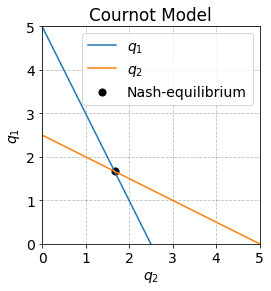

In [26]:
# a. assumption
b_val = 0.5
c_val = 0.5
a_val = 3
q2_vec = np.linspace(-5, 5, 100)
q1 = (a_val - b_val*q2_vec - c_val)/(2*b_val)
q2 = (a_val - b_val*q1 - c_val)/(2*b_val)
intersection_q1_q2 = (a_val - c_val)/(3*b_val)

fig = plt.figure()

# b. create the plot 
ax = fig.add_subplot(1,1,1)

ax.plot(q2,q1,label='$q_{1}$')
ax.plot(q1,q2,label='$q_{2}$')
ax.scatter(intersection_q1_q2,intersection_q1_q2,s=50, marker='o', color='black',label='Nash-equilibrium')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
plt.gca().set_aspect('equal', adjustable='box')
ax.set_title('Cournot Model')
ax.set_xlabel('$q_2$')
ax.set_ylabel('$q_1$')
ax.legend(loc='upper right'); # Activate legend (uses the labels in ax.plot())

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 